In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#Main_Goal: Here we'll refine the outliers treatment in two ways:
    #a) dropping them if they are not to much to prevent reduce a lot the data frame
    #b) replacing them by a reasonable value like the closest wisker


In [3]:
df = pd.read_csv('../../Data/cleaned_data/green_roofs.csv')

df

,green_roof_area,building_area,ratio_green_area,construction_year,roof_height,ground_elev,digitized,borough,xcoord,ycoord,area_type
0,971,14057,0.07,1900,59,90,1,BK,-73.93491,40.67389,public
1,696,4463,0.16,1900,13,21,0,MN,-73.99982,40.73481,commercial
2,293,13217,0.02,1900,93,7,0,MN,-74.00906,40.72480,commercial
3,759,4311,0.18,1900,99,21,0,MN,-74.00836,40.71595,commercial
4,7204,35891,0.20,1990,206,10,1,BX,-73.91227,40.81906,commercial
...,...,...,...,...,...,...,...,...,...,...,...
728,1525,6414,0.24,1800,104,6,0,MN,-74.00968,40.72554,residential
729,343,2941,0.12,1990,118,42,1,MN,-73.99311,40.72600,public
730,309,4350,0.07,1990,175,18,1,MN,-74.01044,40.71474,industrial
731,8139,20051,0.41,1960,23,12,0,MN,-73.93708,40.79703,commercial


In [4]:
df.info() # for some reason pandas didn't detect before the Null value on te column 'area_type'

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 733 entries, 0 to 732
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   green_roof_area    733 non-null    int64  
 1   building_area      733 non-null    int64  
 2   ratio_green_area   733 non-null    float64
 3   construction_year  733 non-null    int64  
 4   roof_height        733 non-null    int64  
 5   ground_elev        733 non-null    int64  
 6   digitized          733 non-null    int64  
 7   borough            733 non-null    object 
 8   xcoord             733 non-null    float64
 9   ycoord             733 non-null    float64
 10  area_type          732 non-null    object 
dtypes: float64(3), int64(6), object(2)
memory usage: 63.1+ KB


In [5]:
# we'll replace it by the mode

mode = df['area_type'].mode()[0]
mode

df['area_type'] = df['area_type'].fillna(mode)

df['area_type'].isna().sum()

0

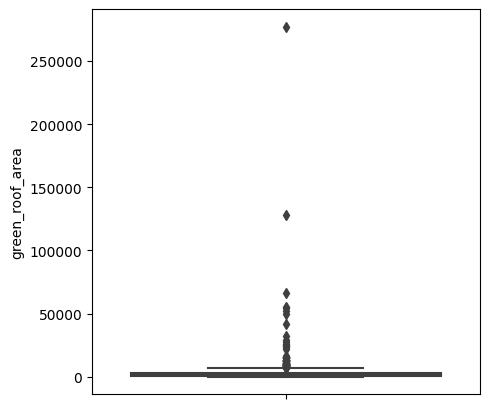

In [6]:
#Columns to check ouliers: green_roof_area, building_area, ratio_green_area, roof_height, ground_elev

#green_roof_area

fig,ax = plt.subplots(figsize = (5,5))
sns.boxplot(data = df, y = 'green_roof_area')
plt.show()


In [7]:
Q1 = df['green_roof_area'].quantile(0.25)
Q3 = df['green_roof_area'].quantile(0.75)

IQR = Q3 - Q1

lower_wisker1 = Q1 - 1.5*IQR
upper_wisker1 = Q3 + 1.5*IQR

print(lower_wisker1) # this wisker don't have any meaning because we only have positive values
print(upper_wisker1)

-3595.5
7176.5


In [9]:
#checking the rows with ouliers

df[df['green_roof_area']>upper_wisker1].sort_values('green_roof_area', ascending= False ).head(10)

,green_roof_area,building_area,ratio_green_area,construction_year,roof_height,ground_elev,digitized,borough,xcoord,ycoord,area_type
165,277317,692314,0.40,1960,175,15,1,MN,-74.00239,40.75795,residential
33,128158,200331,0.64,1990,137,43,1,BK,-73.97516,40.68260,commercial
344,66025,224776,0.29,1990,50,7,1,BK,-74.01159,40.67161,residential
641,55140,126149,0.44,1990,74,9,1,MN,-73.93698,40.82205,commercial
10,54774,152909,0.36,1930,179,90,0,MN,-73.98513,40.77092,commercial
247,52131,174248,0.30,1930,201,25,1,MN,-74.00012,40.75131,residential
409,49895,83074,0.60,1990,129,12,1,MN,-74.01023,40.72684,industrial
552,41338,65005,0.64,1930,142,12,1,BK,-73.97255,40.69840,commercial
266,32252,64956,0.50,1990,299,85,0,MN,-73.96655,40.79472,residential
450,28669,94646,0.30,1990,216,51,0,MN,-73.98944,40.77076,industrial


In [10]:
#CONCLUSION: two big outliers in rows 165 and 33

#DECISION1: we'll drop the row 33. regarding row 165, see the next decision step

#DECISION2: In addition to the first anakysis, we'll drop more outliers:
            #rows 344,641,10,247,409,552,266

df.drop(index = [33,44,641,10,247,409,552,266], inplace = True)

In [11]:
df.shape

(725, 11)

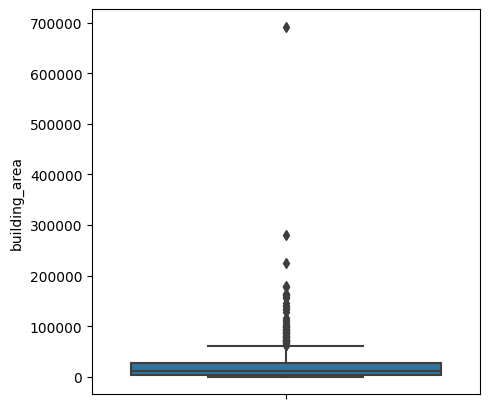

In [12]:
#building_area

fig,ax = plt.subplots(figsize = (5,5))
sns.boxplot(data = df, y = 'building_area')
plt.show()

In [13]:
Q1 = df['building_area'].quantile(0.25)
Q3 = df['building_area'].quantile(0.75)

IQR = Q3 - Q1

lower_wisker2 = Q1 - 1.5*IQR
upper_wisker2 = Q3 + 1.5*IQR

print(lower_wisker2) # this wisker don't have any meaning because we only have positive values
print(upper_wisker2)

-29857.5
61234.5


In [14]:
#checking the rows with ouliers

df[df['building_area']>upper_wisker2].sort_values('building_area', ascending= False )

,green_roof_area,building_area,ratio_green_area,construction_year,roof_height,ground_elev,digitized,borough,xcoord,ycoord,area_type
165,277317,692314,0.40,1960,175,15,1,MN,-74.00239,40.75795,residential
566,9075,280739,0.03,1990,79,13,1,QN,-73.84498,40.75786,residential
344,66025,224776,0.29,1990,50,7,1,BK,-74.01159,40.67161,residential
694,722,178941,0.00,1960,76,48,0,QN,-73.79531,40.70178,residential
55,4160,177959,0.02,1960,71,12,0,MN,-73.94739,40.76373,commercial
141,8324,163605,0.05,1930,103,56,0,QN,-73.82459,40.74697,residential
727,466,163243,0.00,1930,259,19,0,MN,-74.00317,40.74108,residential
273,8915,162276,0.05,1990,79,13,0,QN,-73.83997,40.77192,commercial
282,9518,157733,0.06,1960,296,49,0,BK,-74.02450,40.63926,residential
526,3321,155406,0.02,1960,646,12,0,MN,-74.01587,40.71269,residential


In [15]:
#CONCLUSION: one big outliers in row 165 (the same outlier in green_roof_area)

#DECISION: drop row 165!

#DECISION2: In addition to the first analysis, we'll drop more outliers:
            #rows 566,344

df.drop(index = [165,566,344], inplace = True)

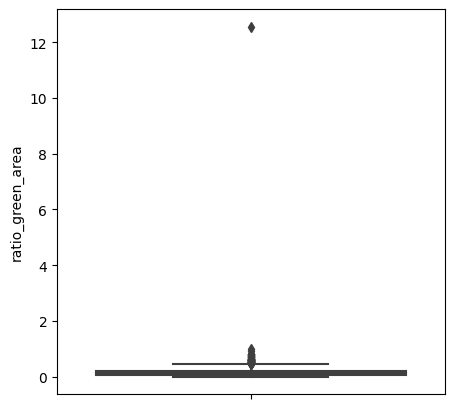

In [16]:
#ratio_green_area

fig,ax = plt.subplots(figsize = (5,5))
sns.boxplot(data = df, y = 'ratio_green_area')
plt.show()

In [17]:
Q1 = df['ratio_green_area'].quantile(0.25)
Q3 = df['ratio_green_area'].quantile(0.75)

IQR = Q3 - Q1

lower_wisker3 = Q1 - 1.5*IQR
upper_wisker3 = Q3 + 1.5*IQR

print(lower_wisker3) # this wisker don't have any meaning because we only have positive values
print(upper_wisker3)

-0.18
0.45999999999999996


In [19]:
#checking the rows with ouliers

df[df['ratio_green_area']>upper_wisker3].sort_values('ratio_green_area', ascending= False ).head(10)

,green_roof_area,building_area,ratio_green_area,construction_year,roof_height,ground_elev,digitized,borough,xcoord,ycoord,area_type
261,1632,129,12.56,1990,8,41,1,QN,-73.93737,40.75018,commercial
256,3630,3721,0.98,1930,15,38,0,BK,-74.03206,40.60893,residential
614,3831,4231,0.91,1960,13,26,0,MN,-73.98404,40.71603,industrial
415,3025,3646,0.83,1930,20,33,0,BK,-73.95800,40.71867,commercial
445,574,721,0.80,1900,17,8,0,BK,-73.86704,40.66269,commercial
102,9743,12154,0.80,1930,20,8,1,BK,-74.01111,40.67389,commercial
660,719,925,0.78,1990,33,61,0,BX,-73.89362,40.85424,residential
458,1610,2086,0.77,1900,61,122,0,MN,-73.96531,40.80677,residential
97,779,1031,0.76,1900,31,157,1,BK,-73.97712,40.66538,commercial
99,1232,1670,0.74,1990,58,25,0,BX,-73.91903,40.85364,residential


In [20]:
#CONCLUSION: one big outliers in row 261: Thus, the value of this outlier (12.56) probably don't make sense because the the area of the green roof
    # is way bigger than the building floor area

#DECISION: Drop the row!

#DECISION2: In addition to the first analysis, we'll drop more outliers:
            #rows 256,614

df.drop(index = [261,256,614], inplace = True)

In [21]:
df.shape

(719, 11)

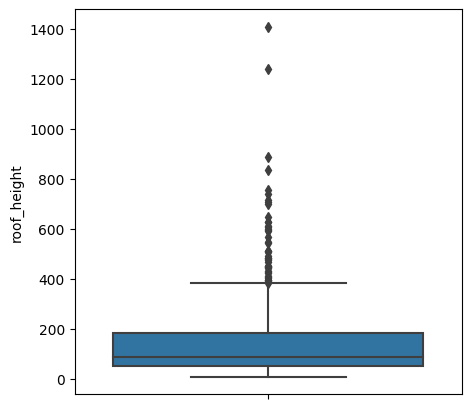

In [22]:
#roof_height

fig,ax = plt.subplots(figsize = (5,5))
sns.boxplot(data = df, y = 'roof_height')
plt.show()

In [23]:
Q1 = df['roof_height'].quantile(0.25)
Q3 = df['roof_height'].quantile(0.75)

IQR = Q3 - Q1

lower_wisker4 = Q1 - 1.5*IQR
upper_wisker4 = Q3 + 1.5*IQR

print(lower_wisker4) # this wisker don't have any meaning because we only have positive values
print(upper_wisker4)

-148.5
383.5


In [24]:
#checking the rows with ouliers

df[df['roof_height']>upper_wisker4].sort_values('roof_height', ascending= False )

,green_roof_area,building_area,ratio_green_area,construction_year,roof_height,ground_elev,digitized,borough,xcoord,ycoord,area_type
90,788,52632,0.01,1990,1408,5,0,MN,-74.01280,40.71256,commercial
171,7992,85500,0.09,1930,1238,50,1,MN,-73.98571,40.74847,industrial
467,5126,85062,0.06,1990,887,60,1,MN,-73.98505,40.75573,commercial
573,14475,98911,0.15,1930,834,64,1,MN,-73.97996,40.75927,residential
582,3101,71264,0.04,1990,755,35,0,MN,-73.98978,40.75595,residential
148,9737,69806,0.14,1990,740,9,1,MN,-74.01452,40.71437,residential
115,4848,145737,0.03,1990,714,84,0,MN,-73.98330,40.76811,residential
580,9836,56895,0.17,1930,708,61,1,MN,-73.97635,40.75611,residential
206,8144,52983,0.15,1960,700,44,1,MN,-73.98612,40.75782,commercial
526,3321,155406,0.02,1960,646,12,0,MN,-74.01587,40.71269,residential


In [26]:
#CONCLUSION: two big outliers in rows 90 and 71. Here we will not drop them, because we want that our models 
#can make predictions in buildings with bigger heights. We have to keep in mind that in NY there are a lot 
#of tall buildings that can have a great variety of heights.

#DECISION: keep all the rows!

#DECISION2: Here rows to drop: 90,171, 467, 573

df.drop(index = [90,171, 467, 573], inplace = True)

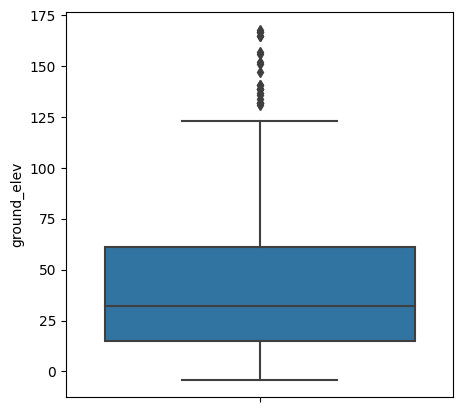

In [27]:
#ground_elev

fig,ax = plt.subplots(figsize = (5,5))
sns.boxplot(data = df, y = 'ground_elev')
plt.show()

In [28]:
Q1 = df['ground_elev'].quantile(0.25)
Q3 = df['ground_elev'].quantile(0.75)

IQR = Q3 - Q1

lower_wisker5 = Q1 - 1.5*IQR
upper_wisker5 = Q3 + 1.5*IQR

df['ground_elev'].min() # -4

print(lower_wisker5) # this wisker don't have any meaning because we only have positive values
print(upper_wisker5)

-54.0
130.0


In [29]:
df[df['ground_elev']>upper_wisker5].sort_values('ground_elev', ascending= False )

,green_roof_area,building_area,ratio_green_area,construction_year,roof_height,ground_elev,digitized,borough,xcoord,ycoord,area_type
569,4774,11568,0.41,1930,51,168,1,BX,-73.88095,40.88708,public
653,22102,41835,0.53,1960,137,167,0,BX,-73.90921,40.89512,commercial
514,6402,11684,0.55,1930,50,167,1,BX,-73.90539,40.88926,commercial
381,16067,32603,0.49,1960,115,165,0,BX,-73.90883,40.89635,commercial
437,854,18755,0.05,1930,36,165,1,BK,-74.00211,40.64692,residential
97,779,1031,0.76,1900,31,157,1,BK,-73.97712,40.66538,commercial
125,691,10520,0.07,1900,60,156,0,BX,-73.89956,40.86924,residential
56,1794,3370,0.53,1960,28,152,0,BX,-73.91392,40.89442,residential
726,8592,17045,0.50,1930,23,151,1,BK,-73.96297,40.66940,residential
435,946,20292,0.05,1900,48,147,0,BX,-73.92539,40.84120,commercial


In [30]:
#CONCLUSION: no big outliers seen. group of twenthy outliers but we'll not drop it since our dataset is not too big.

#DECISION: keep all the rows!

#DECISION2: outliers to drop: rows --> 569,653,514,381,437

df.drop(index = [569,653,514,381,437], inplace = True)

In [31]:
df.to_csv('../../Data/cleaned_data/green_roofs3.csv', index = False)

In [32]:
df.shape

(710, 11)